![](fig/univ.png)

# AI-1: ML/AI Basics
## Homework 1: kNN and Linear Regression

**AI1 Cohort 1**<br/>
**Univ.AI**<br/>
**Instructor**: Pavlos Protopapas<br />
**Maximum Score**: 55

<hr style="height:2.4pt">

In [193]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML

In [194]:
#RUN THIS CELL
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

<hr style="height:2pt">

<h2> INSTRUCTIONS </h2>


- This homework is a jupyter notebook. Download and work on it in your local machine.

- This homework should be submitted in pairs.

- Ensure you and your partner together have submitted the homework only once. Multiple submissions of the same work will be penalised and will cost you 2 points.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. 

- To submit the homework, either one of you upload the working notebook on edStem and click the submit button on the bottom right corner.

- Submit the homework well before the given deadline. Submissions after the deadline will not be graded.

- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them.

- Comment your code well. This would help the graders in case there is any issue with the notebook while running. It is important to remember that the graders will not troubleshoot your code. 

- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
```
- Your plots should include clear labels for the $x$ and $y$ axes as well as a descriptive title ("MSE plot" is not a descriptive title; "95 % confidence interval of coefficients of polynomial degree 5" is).

<hr style="height:2pt">

<h2> Overview </h2> 

This assignment is the first where you will go through the process of loading a dataset, splitting it in train,validation and test sets, 
pre-processing it, and finally using it to run models and evaluating your results. 

We have two different datasets, one with car data in **Part 1** and another with data from an Indian matrimonial web site in **Part 2**.

For part 1, you will explore two simple methods for prediction,  **k-nearest neighbors regression (kNN)**, a *non-parametric* method, and **linear regression**, a *parametric* method. As you move towards Part 2 of the homework, you will work with multiple linear and polynomial regression.

### Names of the people who worked on this homework together
#### Samyak R Jain, Amit Gupta

In [195]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [196]:
# Importing standard libraries
import numpy as np
import operator
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

# Part 2 imports 
from scipy.stats import norm
from sklearn.preprocessing import PolynomialFeatures

In [197]:
# Run this cell for more readable visuals 
large = 22; med = 16; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'axes.linewidth': 2,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.style.use('seaborn-whitegrid')
plt.rcParams.update(params)
%matplotlib inline

<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<h2 style="color:black;background-color:#F6E6E2"> Part A: k-NN and Linear Regression [30 points total] </h2>    <br />


### Problem Description: Predicting the Selling Price of Cars on CarDekho.com

According to its website, **CarDekho.com** is India's leading car search venture. 
Its website and app carry rich automotive content such as expert reviews, 
detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. 
Each car has a **Current selling price**, which is the price for buying the car on this site, and a **MRP**, 
which is the retail price of the car. These two prices differ depending on factors such as brand, 
make year, mileage, condition, etc.  
    
#### DATASET

The dataset contains 601 cars and is in file `car_dekho_full.csv`. It contains the following columns:

- **Year** - make year (year the car was made), 
- **Current_Selling_Price** - current price of a car on CarDekho.com (in lakhs),
- **MRP** - maximum retail price of a car (in lakhs),
- **Kms_Driven** - number of kilometers

Note: 1 *lakh*  is 100,000 Rupees in the Indian numbering system. Also, kilometers are used as a measure of distance instead of miles.

#### Your Task: 
Predict the `Current_Selling_Price` from the other features.




<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<b> Question 1:   Exploratory Data Analysis (EDA) [10 points total]</b>

To reach the goal of predicting the `Current_Selling_Price`, start by inspecting the dataset using Exploratory Data Analysis (EDA).

Load the dataset, inspect it and answer the following questions: 

**1.1** [2pts] Which variables are quantitative, and which are categorical? 

**1.2** [2pts] What are the means and standard deviations for `Current_Selling_Price` and `MRP`? 

**1.3** [2pts] What is the range of Kilometers that the cars have?

**1.4** [4pts] The goal of this part is to identify the best variable from which to predict our respone variable `Current Selling Price`. Plot a scatter plot between each predictor and reponse variable and examine the relationship between the predictors and `Current_Selling_Price`. Based on the plots, which is the  predictor that visually seems to best predict the `Current_Selling_Price`? 
    
**Note**: Label your axes.
</div>

## Solutions 

### 1.1

**Which variables are quantitative, and which are categorical?**

In [198]:
# your code here
# Read car_dekho_full.csv into a dataframe
car_df = pd.read_csv('data/car_dekho_full.csv')
car_df.head()

,Year,Current_Selling_Price,MRP,Kms_Driven
0,2016,5.25,5.70,3493
1,2005,3.51,13.70,75000
2,2010,0.31,1.05,213000
3,2006,2.10,7.60,50456
4,2005,0.20,0.57,55000


In [199]:
print('The quantitative variables are: Current_Selling_Price, MRP, Kms_Driven')
print('The categorical variables are: Year')

The quantitative variables are: Current_Selling_Price, MRP, Kms_Driven
The categorical variables are: Year


### 1.2

**What are the means and standard deviations for Current_Selling_Price and MRP?**

In [200]:
# Name your variables as mean_csp, mean_mrp, std_csp, std_mrp

# your code here

# Mean of Current_Selling_Price
mean_csp = car_df['Current_Selling_Price'].mean()

# Mean of MRP
mean_mrp = car_df['MRP'].mean()

# Standard deviation of Current_Selling_Price
std_csp = car_df['Current_Selling_Price'].std()

# Standard deviation of MRP
std_mrp = car_df['MRP'].std()

# end your code here 


print ("The mean Current Selling Price is", mean_csp,"lakhs")
print ("The mean MRP is", mean_mrp,'lakhs')
print ("The Standard Deviation of Current Selling Price is", std_csp)
print ("The Standard Deviation of MRP is", std_mrp)

The mean Current Selling Price is 4.393078202995008 lakhs
The mean MRP is 6.911552412645585 lakhs
The Standard Deviation of Current Selling Price is 4.518314989263965
The Standard Deviation of MRP is 6.480120956252664


### 1.3

**What is the range of Kilometers that the cars have?**

In [201]:
# your code here

# Minimum Kilometers driven
min_kms = car_df['Kms_Driven'].min()

# Maximum Kilometers driven
max_kms = car_df['Kms_Driven'].max()

# Range of Kilometers driven
range_kms = max_kms - min_kms

#Print the range, maximum and minimum kilometers driven
print(f'The range of Kilometers that the cars have is: {range_kms} kms')
print(f'Minimum Kilometers driven: {min_kms} kms')
print(f'Maximum Kilometers driven: {max_kms} kms')

The range of Kilometers that the cars have is: 212500 kms
Minimum Kilometers driven: 500 kms
Maximum Kilometers driven: 213000 kms


### 1.4

**The goal of this part is to identify the best variable from which to predict our respone variable Current Selling Price. Plot a scatter plot between each predictor and reponse variable and examine the relationship between the predictors and Current_Selling_Price. Based on the plots, which is the predictor that visually seem to best predict the Current_Selling_Price?**

Text(0.5, 1.0, 'Scatter plot of Current Selling Price vs MRP')

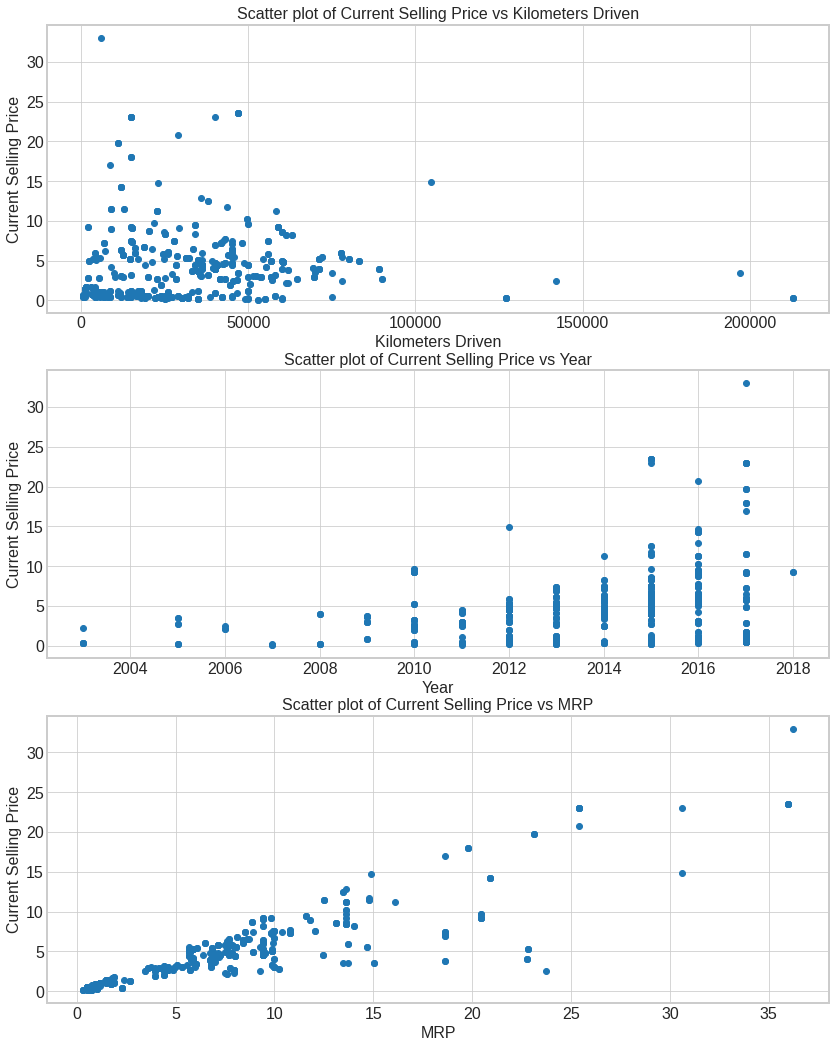

In [202]:
# your code here

# Response variable - Current_Selling_Price
current_selling_price = car_df['Current_Selling_Price'].values

# Predictor variable - Kms_Driven
kms_driven = car_df['Kms_Driven'].values

# Predictor variable - Year
year = car_df['Year'].values

# Predictor variable - MRP
mrp = car_df['MRP'].values

# Create scatter plots for all 3 predictor variables vs the response variable

# Create 3 subplots in a single figure and set the figure size
fig, (ax0, ax1, ax2) = plt.subplots(3, 1)
fig.set_size_inches(14, 18)

# Create scatter plot with Kilometers Driven as the predictor
ax0.scatter(kms_driven, current_selling_price)
ax0.set_xlabel('Kilometers Driven')
ax0.set_ylabel('Current Selling Price')
ax0.set_title('Scatter plot of Current Selling Price vs Kilometers Driven')

# Create scatter plot with Year as the predictor
ax1.scatter(year, current_selling_price)
ax1.set_xlabel('Year')
ax1.set_ylabel('Current Selling Price')
ax1.set_title('Scatter plot of Current Selling Price vs Year')

# Create scatter plot with MRP as the predictor
ax2.scatter(mrp, current_selling_price)
ax2.set_xlabel('MRP')
ax2.set_ylabel('Current Selling Price')
ax2.set_title('Scatter plot of Current Selling Price vs MRP')

**From the above scatter plots, it is evident that the predictor MRP has a strong positive correlation with the response variable Current_Selling_Price. Thus, MRP is visually the best predictor for predicting the response variable Current_Selling_Price.**


<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<b> Question 2:   k-Nearest Neighbors  [10 points total]</b>
<br /><br />
We begin our modeling with k-Nearest Neighbors (kNN) regression. You may use `sklearn`'s built-in functions.
<br /><br />

**2.1** [6pts] In this part, we will model a kNN regression on the predictor chosen above (1.4) and the response variable `Current_Selling_Price`.
<br /><br />
    
INSTRUCTIONS:
<br />
- Split the dataset in train and test set with 75% training data and 25% testing data, using the random_state = 109.  
<br />
- Fit a kNN regression model to the training set for the following 8 different values of $k$:  $k = 1,2,3,5,7,10,50,100$. 
<br />
- Make 8 scatter plots of response vs. predictor for each $k$, arranged in a $4\times2$ grid.  Each figure should have plots of the prediction from the k-NN regression and the actual data points on the same figure, as well as axis labels, title, and legend. Consider using the subplot functionality, unless you first try this and then decide that you have a clearer, cleaner way of communicating these plots.
<br />
- Evaluate the $MSE$ for the fitted models on both the training and test sets **for each $k$**.
<br />
- Plot the training and test $MSE$ values as a function of $k$ on the same figure.  Again, the figure must have axis labels and a legend.
<br />
- Find the best model based on the test $MSE$ values.
<br />
- Evaluate and report the $R^2$ of the best model.

<br /><br />
**2.2** [4pts] Discuss your results by answering the following questions.  You should answer the questions directly in a markdown cell of your notebook.
<br /><br />
- How does the value of $k$ affect the fitted model?
<br />
- If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?  
- Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.
<br />
- Run the same code by changing the random seed during the train-test split. Do you always get the same answer? If not, why?
<br />
    
    </div>

### Solutions

### 2.1
In this part, we will model a kNN regression on the predictor chosen above (1.4) and the response variable `Current_Selling_Price`.

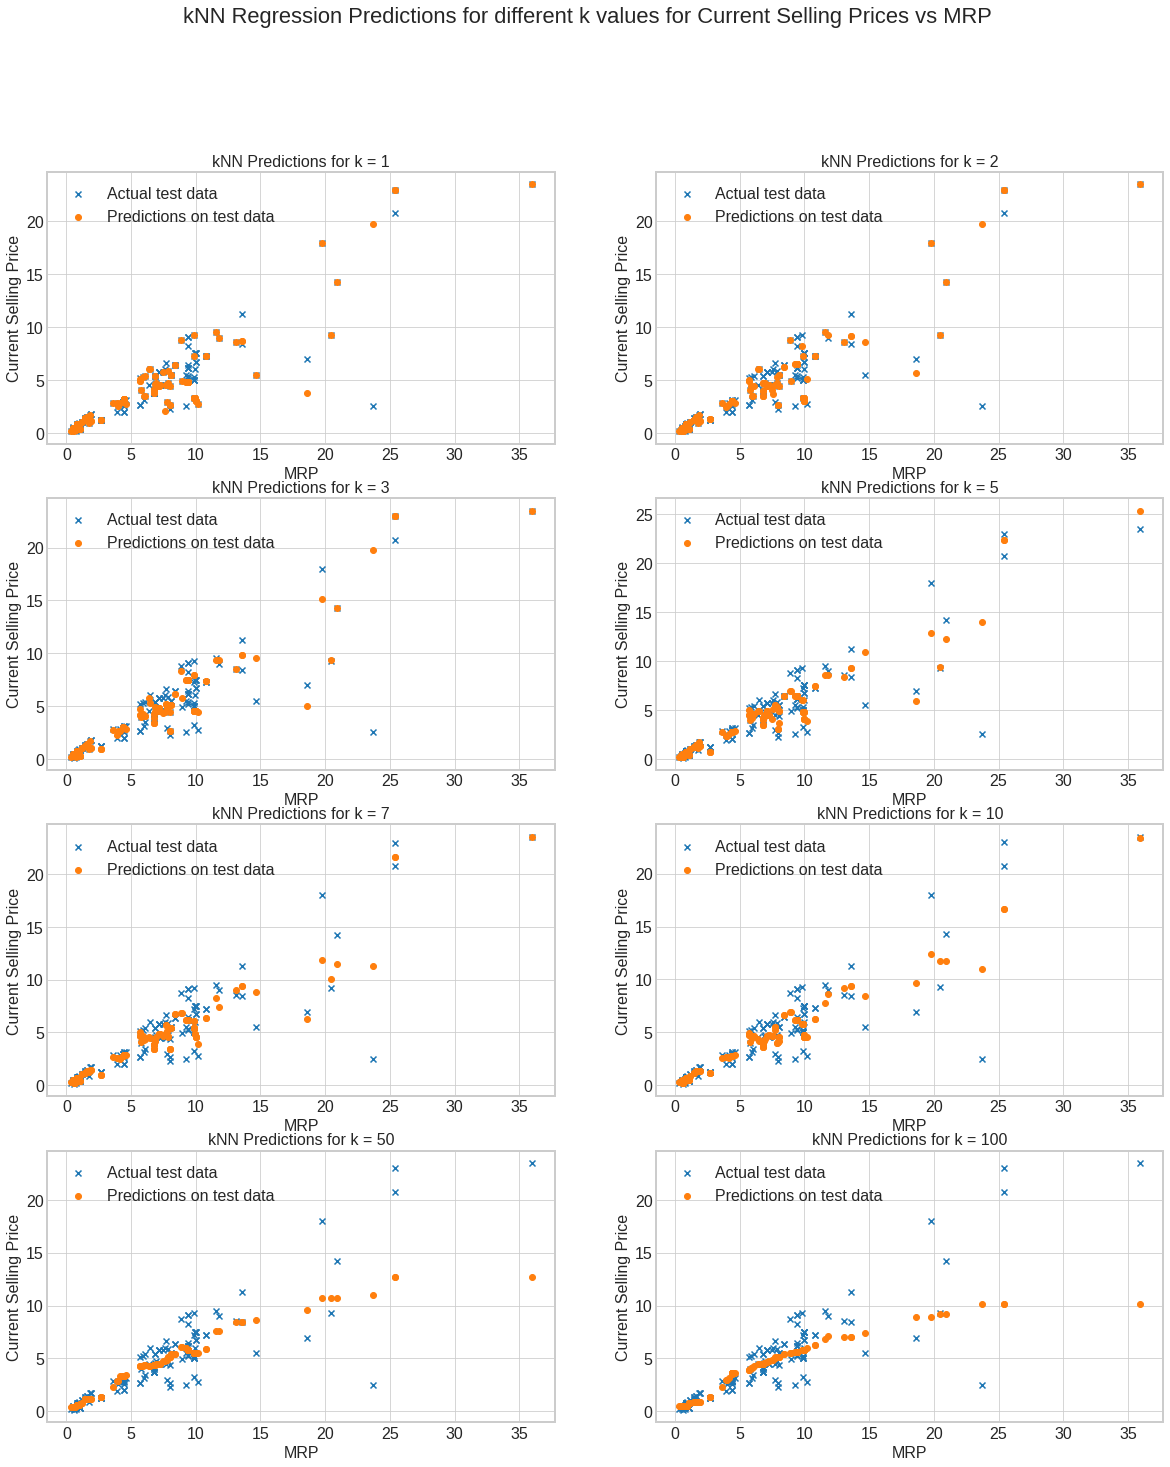

In [203]:
#Choosing your predictor and response variable
# your code here

X = car_df[['MRP']]
y = car_df['Current_Selling_Price']

# end of your code here 


##Splitting the data into train and test sets with 75% training data and 25% testing data. Set random_state=109
# your code here

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=109)

# end of your code here  


## Fit a kNN regression model to the training set for the following 8 different values of  𝑘 :  𝑘=1,2,3,5,7,10,50,100 .
## and make 8 scatter plots of response vs. predictor for each  𝑘 , arranged in a  4×2  grid. 
## Each figure should have plots of the prediction from the k-NN regression and the actual data points on the same figure, as well as axis labels, title, and legend 
# your code here 

# List of k values to fit kNN regression model for
k_values = [1, 2, 3, 5, 7, 10, 50, 100]

# Dictionary mapping k value to list of kNN regression predictions for TEST DATA
k_test_pred = {}

# Dictionary mapping k value to list of kNN regression predictions for TRAIN DATA
k_train_pred = {}

# Iterate through each k in k_values and fit a kNN regression model and store the predictions
for k in k_values:
    
    # Define the kNN regressor and fit the model on training data
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)
    
    # Predict on both training and test sets and store the results
    k_train_pred[k] = knn_regressor.predict(X_train)
    k_test_pred[k] = knn_regressor.predict(X_test)
    
    
# Plotting

fig, axes = plt.subplots(4, 2)
fig.set_size_inches(20, 23)

idx_k = 0

classes = ['Actual test data', 'Predictions on test data']

for row in axes:
    
    for ax in row:
        
        # Get the k
        k = k_values[idx_k]
        
        # Create the 2 scatter plots - one for actual data, one for predicted data
        scat1 = ax.scatter(X_test, y_test, marker = 'x')
        scat2 = ax.scatter(X_test, k_test_pred[k], marker = 'o')
        
        # Add labels and legend to the plot
        ax.set_xlabel('MRP')
        ax.set_ylabel('Current Selling Price')
        ax.legend(handles=[scat1, scat2], labels=classes, )
        
        # Set title of subplot
        ax.set_title('kNN Predictions for k = {}'.format(k))
        
        
        # Increment index to get next k value
        idx_k += 1

fig.suptitle('kNN Regression Predictions for different k values for Current Selling Prices vs MRP')
plt.show()

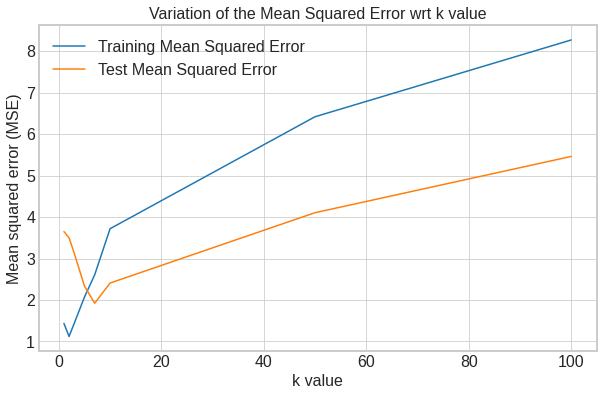

In [204]:
# Now make the MSE plots
# your code here

# Create arrays to store MSEs for train and test data
mse_train = []
mse_test = []

# Iterate through each k, calculate the MSE for train and test data and store it
for k in k_values:
    mse_train.append(mean_squared_error(y_train, k_train_pred[k]))
    mse_test.append(mean_squared_error(y_test, k_test_pred[k]))

    
# Plot the variation of MSE with respect to k 
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

# Plot the train and test MSEs 
ax.plot(k_values, mse_train, label='Training Mean Squared Error')
ax.plot(k_values, mse_test, label='Test Mean Squared Error')

# Set labels, title and legend
ax.set_xlabel('k value')
ax.set_ylabel('Mean squared error (MSE)')
ax.set_title('Variation of the Mean Squared Error wrt k value')
ax.legend()

# Show the plot
plt.show()

In [205]:
# Find the best model
# your code here

# Get the index of the lowest Test MSE value
min_mse_idx = mse_test.index(min(mse_test))

# Get the best k using the previous index
k_best_model = k_values[min_mse_idx]

print(f'The Test MSE for the best kNN Regression Model = {min(mse_test)}')
print(f'The best kNN Regression Model has the value of k = {k_best_model}')

The Test MSE for the best kNN Regression Model = 1.9218710771725909
The best kNN Regression Model has the value of k = 7


In [206]:
##Compute the R-squared for the best model
# your code here

# Calculate the R-squared using the predictions of the best model on test data
r2_value = r2_score(y_test, k_test_pred[k_best_model])

print('The R-squared value for the best model = {}'.format(r2_value))

The R-squared value for the best model = 0.88067733251126


### 2.2

**Your answer here**

**a) How does the value of $k$ affect the fitted model?**
<br />
The value of $k$ in a kNN regression model determines how well does the model perform, hence choosing the right $k$ is important. Choosing a very low $k$ may cause the model to overfit on the training data and hence perform poorly on the test data. Choosing a high $k$ may cause the model to underfit on the training data and may not be the true representation of the data. One should try out different values of $k$ and choose the $k$ that gives the lowest loss. 

**b) If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?**
<br />
If $k = n$ in a kNN regression model, then our model would just be the mean (average) of the response values in the training data. This is because for every new $X$, the kNN model would take the average of the outputs of $k$ observations, which in this case would be all the observations. So, any new $X$ would give the same $y$ value - mean of the training set.

**c) Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.**
<br />
No, the training and test MSE plots exhibit similar trend. As $k$ is increased initially, the MSE decreases and reaches a lowest point for a particular value of $k$. Beyond this value, the MSE starts to increase again. 

A very low value of k like k=1 will be very close to the training data and not generalize well. It will overfit on the training set and hence training MSE will be very less. Test MSE for the same will be higher because the model is overfit on training data.

A very high value of k like k=100 will be too general. It takes into account the points which are very far from the point in consideration and defeats the purpose of k-Nearest Neighbors. This model will underfit on training data and both Test and Training MSEs will be high.

**d) Run the same code by changing the random seed during the train-test split. Do you always get the same answer? If not, why?**
<br />
No, we don't get the same answer by changing the random seed. 
This is because the training data sample changes from one random seed to another. The model is then fit on a different sample of the training data which may produce different results.


<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<b> Question 3:  Simple Linear Regression   [10 points total]</b>
<br /><br />

**3.1** [5pts] We will now fit our data using a linear regression model. Choose the same **predictor** and **response** variables used to model kNN regression.
<br /><br />
- You will use the same 75% training and 25% testing split of the data, using the same random_state = 109. 
<br />
- Run a Linear Regression model.
<br />
- Report the slope/coefficient and intercept values for the fitted linear model.
<br />
- Report the $MSE$ for the training and test sets and the $R^2$ from the test set.
<br />
- Plot the **residuals** $e = y - \hat{y}$ of the model on the training set as a function of the response variable. Draw a horizontal line denoting the zero residual value on the Y-axis. Discuss the shape of the plot and what it shows for the quality of the model.
<br /><br />

**Note:** Use the `sklearn` module for linear regression. This module has built-in functions to summarize the results of regression and produce residual plots. Create a `Linear Regression` model, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions. As previously, you may use the `mean_squared_error` function to compute $MSE$.
<br /><br />
**3.2** [5pts] Discuss your results by answering the following questions.  
<br />
- How does the test $MSE$ score compare with the best test $MSE$ value obtained with k-NN regression? 
<br />
- What does the sign of the slope of the fitted linear model convey about the data? 
<br />
- Based on the residual plot that you made, discuss whether or not the assumption of linearity is valid for this data.
<br /><br />
    </div>


### Solutions

### 3.1
**Predict the selling price**

The slope/coefficient value of the linear model = 0.6156599214296153
The intercept value of the linear model = 0.11236987692104439
The train MSE of the linear model = 4.713332797955166
The test MSE of the linear model = 3.136167052174168
The R-squared value of the linear model = 0.8052856808135865


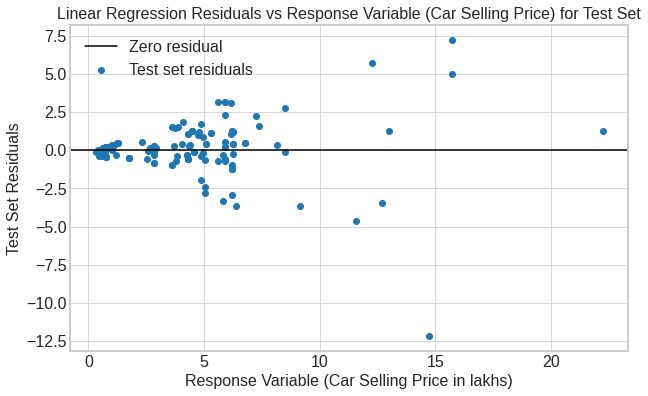

In [207]:
## Fit a linear model to the train data

# your code here

# Create and train the linear regression model on the training data
lreg_model = LinearRegression()
lreg_model.fit(X_train, y_train)

# Get the predictions of the model on train and test data
y_train_pred = lreg_model.predict(X_train)
y_test_pred = lreg_model.predict(X_test)

# Get the coefficient/slope of the linear regression model
lreg_coeff = lreg_model.coef_

# Get the intercept of the linear regression model
lreg_intercept = lreg_model.intercept_

# Calculate the MSE for train and test data
lreg_train_mse = mean_squared_error(y_train, y_train_pred)
lreg_test_mse = mean_squared_error(y_test, y_test_pred)

# Calculate the r-squared value on the test set
lreg_r2_score = r2_score(y_test, y_test_pred)

# Report the values
print(f'The slope/coefficient value of the linear model = {lreg_coeff[0]}')
print(f'The intercept value of the linear model = {lreg_intercept}')
print(f'The train MSE of the linear model = {lreg_train_mse}')
print(f'The test MSE of the linear model = {lreg_test_mse}')
print(f'The R-squared value of the linear model = {lreg_r2_score}')

# end of your code here 


## Plot the **residuals** 
# your code here 

# Calculate the residuals of the model on test set
lreg_residuals = y_test - y_test_pred

# Create the figure and subplot and set size
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

# Plot the residuals as a function of the response variable (y_test_pred)
ax.scatter(y_test_pred, lreg_residuals)

ax.axhline(color='Black')
ax.legend(['Zero residual', 'Test set residuals'])

ax.set_xlabel('Response Variable (Car Selling Price in lakhs)')
ax.set_ylabel('Test Set Residuals')
ax.set_title('Linear Regression Residuals vs Response Variable (Car Selling Price) for Test Set')

plt.show()

### 3.2

**Your answer here**

**a) How does the test $MSE$ score compare with the best test $MSE$ value obtained with k-NN regression?**
<br />
The Test MSE of Linear Regression model (MSE = 3.136) is more than the best test MSE value obtained with kNN regression (MSE = 1.922). Thus, the best kNN model is better than the Linear Regression model at predicting the Car Selling Price using MRP.

**b) What does the sign of the slope of the fitted linear model convey about the data?**
<br />
The slope of the fitted linear model is positive (= 0.615). This indicates that there is a positive correlation between the predictor and response variable. This means that when MRP increases, the Car Selling Price also increases.

**c) Based on the residual plot that you made, discuss whether or not the assumption of linearity is valid for this data.
<br />**
According to the residual plot above, it is safe to assume that linearity is valid for this data. The plot clearly shows that the residuals are symmetric around y=0. Also the density of the points is higher near the y=0 line and lower away from it. Also, there is no obvious relationship between the residuals and the response variable. These characteristics of the plot indicate that the data is independent and normally distributed. Hence, the linear assumption is valid.


<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2"><b> Question 4:  Linear Regression with Feature engineering  [Optional]</b>
<br /><br />

**4.1** Creating a new variable from existing data: percentage depreciation
<br />
Feature engineering involves transforming data into features that better represent the underlying problem to the predictive models. This results in improved model accuracy on unseen data. 
<br />
Our previous regression model relates the Current selling price to the MRP of the car with the equation:
<br /><br />
$$CSP = \beta_0 + \beta_1*MRP$$
<br />
However, this linear equation does not incorparate other interesting variables such as the ```year of manufacture```, or the ```kms driven```, which maybe important factors that affect the overall price of the car. 
<br />
Instead of using multi-linear analysis, we can perform some intelligent feature engineering to identify other simple linear relationships within our data.
<br />
From practical experience, we know that the percentage drop of a car's price is proportional to the age of the car ([more on car depreciation here](https://www.finder.com/what-is-car-depreciation)). 
<br />
Hence, it makes sense to investigate this variable seperately and try to identify possible relationships with other variables.  
<br />
Define the percentage depreciation of the Current selling price to the MRP as follows:
<br /><br />
$$\textrm{Percentage of the Selling Price}=perc =\frac{MRP - Selling Price}{MRP}$$
    
<br /><br />
**4.2** Exploratory Data Analysis
<br /><br />
For this section, we will consider `perc` to be our intermediate response variable. To understand the relationship between `perc` and our predictor variables we will perform EDA.
<br /><br />
Answer the following questions by plotting graphs.
<br /><br />
a) It is seen previously that there is a relationship between `Year` and `Current Selling Price`. Is the relationship between `Year` and `perc` the same. If not, how has it changed and why do you think so?
<br />
b) Is the trend between the `MRP` and `perc` the same as that between `MRP` and `Current Selling Price`?
<br />
c) Does there seem to be a relationship between `Kms_Driven` and `perc` ? 
<br />
d) Which is the best predictor to predict `perc`, if there is one? Is it the same as that of `Current Selling price` or has it changed?
<br /><br />
**4.3** Perform additional EDA 
<br /><br />
Feel free to use other plots and statistics to find the best predictor and/or understand the relationship between variables. One example is given below. It is a plot of `Current Selling Price` vs `Year` that is color coded based on the `Kms_Driven`.
<br /><br />
**4.4** Fitting a Linear Regression model
<br /><br />
Based on the previous EDA choose appropriate **feature** variable(s) and **response** variable.
<br /><br />
- Again, split the data into training data of 75% and testing data of 25%.
<br />
- Fit a Linear Regression model for each of the predictors.
<br />
- Predict the model for the train and test data.
<br />
- Plot a graph with the test data with predictor variable on the *x* axis and `perc` on the *y* axis. Also plot the fit curve. Ensure you use the correct labels and show the legend.
<br />
- Report the $MSE$ score from the training and test sets.
<br />
- Find the best model i.e. the best predictor based on the $MSE$ of each model.
<br /><br />

**4.5** Predicting The Current Selling Price using ```perc``` 
<br /><br />
After performing the above analysis, answer briefly as to why are we getting such a dramatic increase in the R2 score?
    <br /><br />
 </div>

## Solutions

### 4.1

In [208]:
#Create a new column perc and add to the dataframe
# your code here

#Creating a new column perc


### 4.2

In [209]:
# your code here


**Your answer here**


In [210]:
# your code here


**Your answer here**


In [211]:
# your code here


**Your answer here**


### 4.3

In [212]:
#your code here

### 4.4

In [213]:
# Linear Regression using Year as the reponse variable
# your code here


In [214]:
# Linear Regression using MRP as the reponse variable
# your code here


In [215]:
# Linear Regression using KMs Driven as the reponse variable
# your code here


**Your answer here**


### 4.5

In [216]:
#Linear Regression using Year as the reponse variable
# your code here


**Your answer here**


<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<h2 style="color:black;background-color:#F6E6E2"> Part Β :  Multi-Linear Regression [25 points total] </h2><br />


### Problem Description: 

Analysis of publically available profiles on simplymarry.com to learn more about the biases, income disparity & other interesting trends in India. 

#### Dataset

The dataset was aggregated from the SimplyMarry.com site.

All the attributes refer to traits and preferences of the person looking for a spouse. 

- **age** - Age of person looking for a spouse
- **gender** - Female:0, Male:1 
- **height** - Height in inches
- **bmi** - BMI calculated based on height and weight
- **eating** - {'Doesn't Matter':0, 'Jain': 1, 'Vegetarian': 2, 'Vegetarian With Eggs': 3, 'Non Vegetarian': 4}
- **family_type** - ('Doesn't Matter': 0, 'Others':3, 'Nuclear': 1, 'Joint family both parents': 2, 'Joint family only mother':2, 'Joint family father mother and brothers sisters':2, 'Joint family single parent brothers and or sisters':2, 'Joint family only father': 2)
- **status** - If social status matters to the person looking for a spouse: {'Doesn't Matter': 0, 'Middle Class': 1, 'Upper Middle Class': 2, 'High Class': 3, 'Rich / Affluent': 4}
- **manglik** - {'No': 0, 'Yes': 1, 'Do Not Know': 2} ([More on this feature](https://en.wikipedia.org/wiki/Mangala_Dosha))
- **drinking** - {'Doesn't Matter':0, 'No': 1, 'Occasionally': 2, 'Yes': 3}
- **complexion** - {'Very Fair ': 1, 'Fair ': 2, 'Wheatish Medium ': 4, 'Wheatish ':3, 'Dark':5}
- **body** - {'Slim': 1, 'Average': 2, 'Heavy': 3, 'Athletic': 4}
- **education** - {'High School':0, 'Some college':1,'Undergrad':2, 'Grad':3, 'Doctorate':4}
- **city** - ('International': 1, 'Mumbai': 2, 'Delhi':3, 'Kolkata':4,'Bengaluru':5, 'Chennai':6, 'Hyderabad':7, 'Pune':8, 'Ahmedabad':9,'Surat':10, 'Vishakapatnam':11, 'Others':12)
- **income** - {Annual income in dollars}

*source: Harvard IACS*

#### Sensitive attributes in the data

It is thought that users are mostly sincere when stating their preferences about their desired partner, and are unlikely to hide any deeply held cultural or sociological biases in order to be perceived as being politically correct. This might take care of the problem with surveys where responses touching on social norms are notorious for self-report bias.

This is a dataset designed to make you think about issues of bias and social issues in datasets. We hope that you will be able to derive insights into the above mentioned sociological biases. The data could potentially provide answers to interesting questions with associated policy ramifications, such as do these biases reduce among more educated users, or more urban users?  

In [217]:
# Read the file named "Income_prediction.csv"

df = pd.read_csv('data/income_prediction.csv')
df.head()

,age,gender,height,kgs,bmi,eating,status,marital_status,family_type,manglik,horoscope,drinking,smoking,values,complexion,body,caste_imp,employed,living,education,income,city
0,25,1,62,50,20.161,4,1,1,2,0,1,1,1,2,2,1,1,4,1,0,2500,12
1,28,0,66,62,22.062,2,2,1,2,2,1,1,1,2,2,2,1,4,1,2,7500,8
2,30,1,69,72,23.441,2,1,1,1,1,1,1,1,5,2,1,0,5,0,2,7500,8
3,34,0,63,58,22.651,4,1,4,1,0,1,1,1,2,2,2,0,4,1,2,4167,10
4,30,0,62,72,29.032,2,2,1,1,0,1,1,1,3,1,2,0,5,1,3,20833,6


<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">

<b> Question 5:   Using Data science to learn more about Indian society  [15 points total]</b>
<br />
First we are going to use simple analytics to learn more about Indian society with the help of this dataset.

The idea is to use basic modeling based on averages & sample distributions to uncover suspected biases, such as gender, skin tone & manglik status.
<br /><br />
Answer the below questions using plots & simple statistics
<br /><br />
**5.1** [2pt] Is there a gender-bias for income of participants?
<br /><br />
**5.2** [2pt] Is there a correlation between income and skin complexion?
<br /><br />
**5.3** [2pt] Is there a discernable trend in the incomes of participants from different regions/cities?
<br /><br />
**5.4** [1pt] Is there a clear trend between BMI and the income?
<br /><br />
**5.5** [2pt] Does the level of education show a clear trend with income?
<br /><br />
**5.6** [2pt] Do any of the numeric attributes show a clear non-linear dependence with the amount of income?
<br /><br />
**5.7** [2pt] Is the income lower or high for those living in 'nuclear' families?
<br /><br />
**5.8** [2pt] Is being 'Manglik' negatively affect the income of participants?

### Solutions

### 5.1

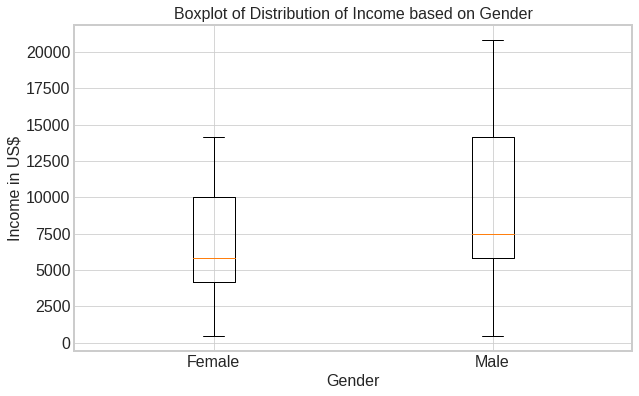

Average income of female participants is US$ 8450.58
Average income of male participants is US$ 13849.10
Average income difference between male and female participants is US$ 5398.52
Yes, there is a gender bias in the income of the participants as visible from the plot and data above.


In [218]:
# your code here
female_incomes = df.loc[df['gender'] == 0, 'income']
avg_female_income = female_incomes.mean()

male_incomes = df.loc[df['gender'] == 1, 'income']
avg_male_income = male_incomes.mean()

income_diff = np.abs(avg_male_income - avg_female_income)

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.boxplot([female_incomes, male_incomes], labels=['Female', 'Male'], showfliers=False)
ax.set_ylabel('Income in US$')
ax.set_xlabel('Gender')
ax.set_title('Boxplot of Distribution of Income based on Gender')
plt.show()

print('Average income of female participants is US$ {:.2f}'.format(avg_female_income))
print('Average income of male participants is US$ {:.2f}'.format(avg_male_income))
print('Average income difference between male and female participants is US$ {:.2f}'.format(income_diff))
print('Yes, there is a gender bias in the income of the participants as visible from the plot and data above.')

### 5.2

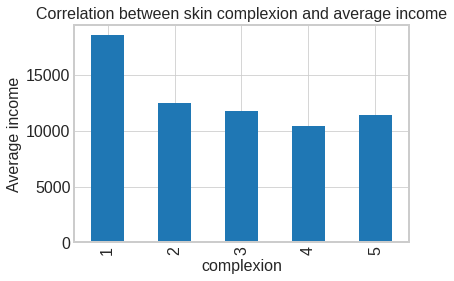

In [219]:
# you code here 
skin_bias = df.groupby('complexion')['income'].mean().values
df.groupby('complexion')['income'].mean().plot.bar()
plt.title('Correlation between skin complexion and average income')
plt.ylabel('Average income')
plt.show()

#### We can see that as complexion changes from 1 to 5 i.e., from 'Very Fair' to 'Dark', there is a negative trend in the average income of the participants. However, the trend does not seem to be linear.

### 5.3

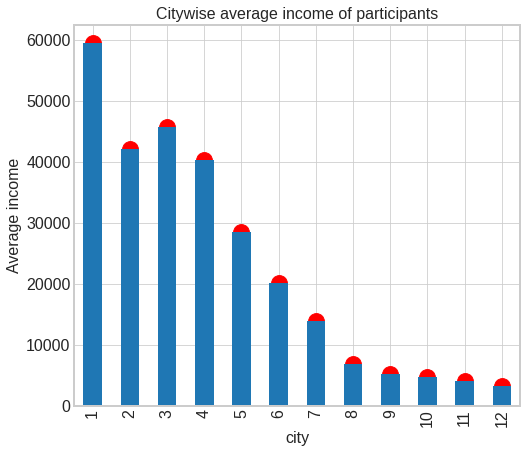

In [220]:
# your code here
city_bias = df.groupby('city')['income'].mean().values
plt.figure(figsize=(8,7))
df.groupby('city')['income'].mean().plot.bar()
plt.scatter(range(0,12),city_bias,s=250,color='red')
plt.title('Citywise average income of participants')
plt.ylabel('Average income')
plt.show()

#### Among cities and the income we can see there is a decaying exponential relationship. As we go from cities 1 to 12, i.e. from big International cities, Mumbai, Bangalore, Delhi, etc. to relatively smaller cities like Pune, Surat, Ahmedabad, etc. the average income of the people seems to decrease exponentially.

### 5.4

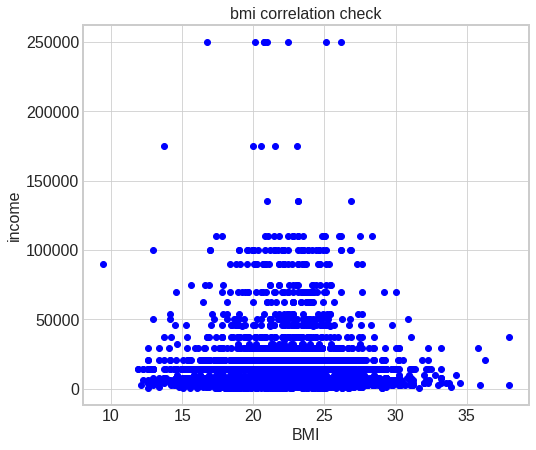

In [221]:
# your code here
plt.figure(figsize=(8,7))
plt.scatter(df[['bmi']],df['income'],color='blue')
plt.title('bmi correlation check')
plt.xlabel('BMI')
plt.ylabel('income')
plt.show()

#### There is NO clear discernible trend between BMI and the Income of the participants.

### 5.5

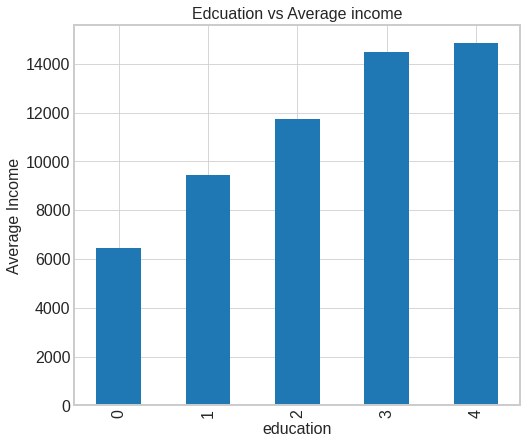

In [222]:
# your code here

education_bias = df.groupby('education')['income'].mean().values
plt.figure(figsize=(8,7))
df.groupby('education')['income'].mean().plot.bar()
plt.title('Edcuation vs Average income')
plt.ylabel('Average Income')
plt.show()

#### There is a clear positive increasing relationship among the level of education and mean income earned by the participants. As the education level changes from 0 to 4 i.e., from 'High School' to 'Doctorate', the average income also increases. 

### 5.6

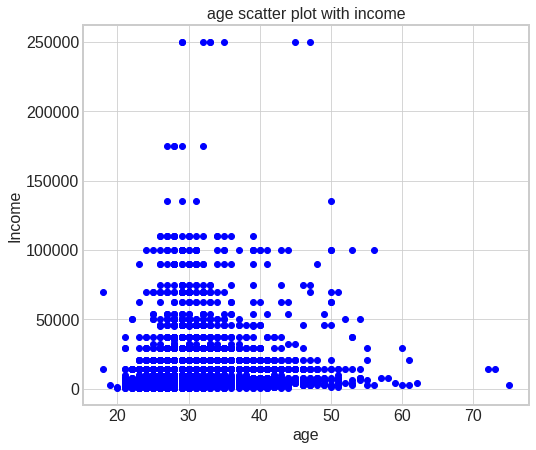

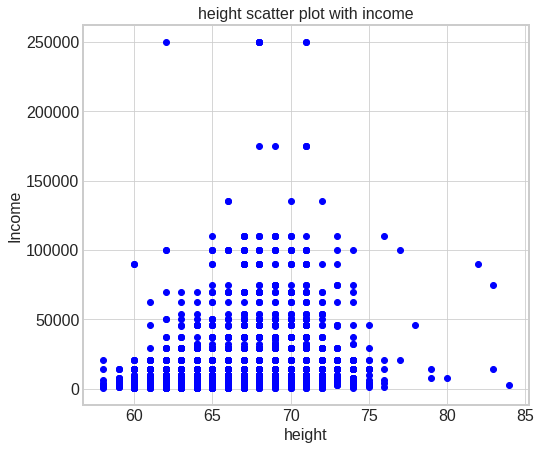

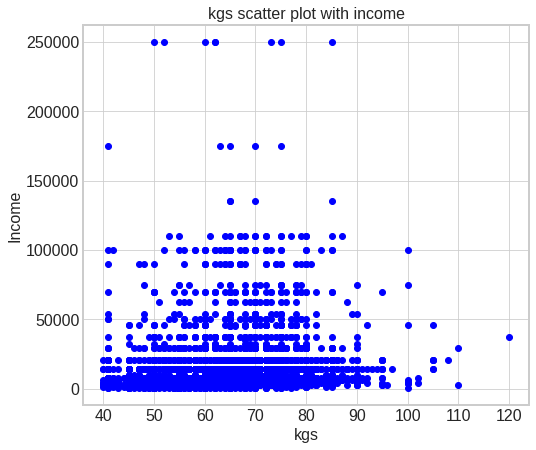

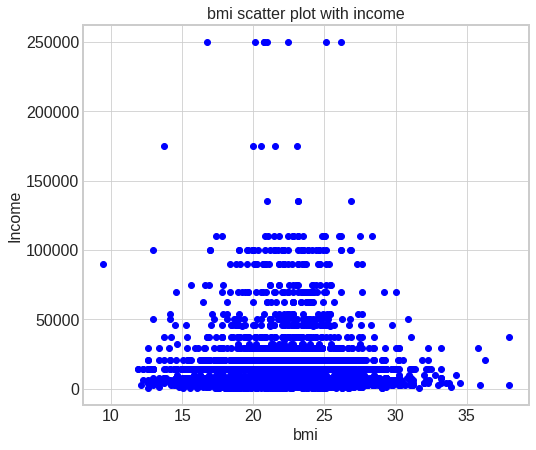

In [223]:
# your code here
num_features = ['age','height','kgs','bmi']
for col in num_features:
    plt.figure(figsize=(8,7))
    plt.scatter(df[[col]],df['income'],color='blue')
    plt.title(col+' scatter plot with income')
    plt.xlabel(col)
    plt.ylabel('Income')
    plt.show()

#### From the above plots, it is evident that there is NO LINEAR dependence between the numeric features (age, height, kgs, bmi) and the income. Since there is no linear dependence, it can be said that THERE IS NON-LINEAR DEPENDENCE between the numeric featuers and the income. However, it is not clear visually what type or degree of non-linearity exists in any of them.

### 5.7

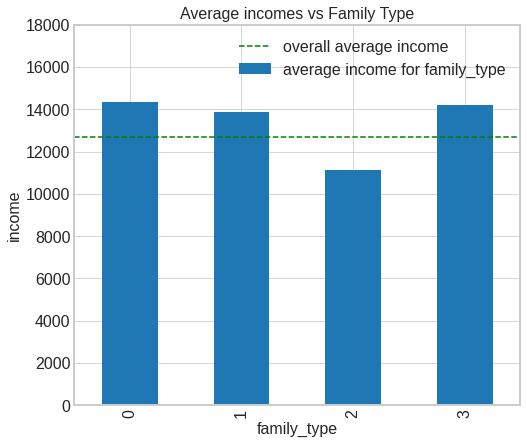

In [224]:
# your code here
family_bias = df.groupby('family_type')['income'].mean().values
plt.figure(figsize=(8,7))
df.groupby('family_type')['income'].mean().plot.bar(ylim=(0, 18000))
plt.axhline(df['income'].mean(),linestyle='--',color='green')
plt.legend(['overall average income', 'average income for family_type'])
plt.title('Average incomes vs Family Type')
plt.ylabel('income')
plt.show()

#### family_type=1 is for nuclear family. As we can see from the plot, the mean income of participants having a nuclear family is higher than the mean income of all participants. The income of nuclear family participants is higher than those in joint families but less than those in 'others' and 'doesnt matter'

### 5.8

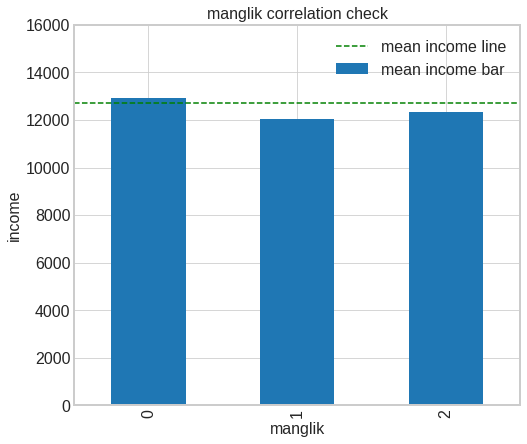

In [225]:
# your code here
manglik_bias = df.groupby('manglik')['income'].mean().values
plt.figure(figsize=(8,7))
df.groupby('manglik')['income'].mean().plot.bar(ylim=(0, 16000))
plt.axhline(df['income'].mean(),linestyle='--',color='green')
plt.legend(['mean income line', 'mean income bar'], loc='upper right')
plt.title('manglik correlation check')
plt.ylabel('income')
plt.show()

#### Manglik no=0, yes = 1, dont know=2. From the graph above, we can see that participants who are Manglik generally have the lowest average income as compared to those who are not and those who don't know.

<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<b> Question 6:  Calculate the Gini Index  [10 points total]</b>


Gini coefficients are often used to quantify income inequality, read more [here](http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm).

The Gini coefficient is defined by the formula:

$G = \dfrac{ \sum_{i=1}^{n} (2i - n - 1) x_i}{n  \sum_{i=1}^{n} x_i}$

where $x$ is an observed value, $n$ is the number of values observed and $i$ is the rank of values in **ascending** order.

A Gini Index of 0 implies perfect income equality, whereas a gini index close to 1 implies a concentration of wealth among the richest few.
<br /><br />
**6.1** Based on the above formula, calculate the Gini coffient for the income of the participants of this dataset
<br /><br />
**6.2** Compare your gini index with other countries

According to the [world bank estimate](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) the gini index of South Africa is 0.6 while that of Ukrain is 0.25. 

Based on your calculated gini index value for this dataset, what is your conclusion on the income disparity in the three countries?

### Solutions

### 6.1

In [226]:
# your code here
inc = df['income'].values
n = len(inc)
numerator = np.sum([(2*(i+1) - n - 1) * inc[i] for i in range(n)])
denominator = n * np.sum(inc)
gini_index = numerator / denominator
print(f'The gini index for the income of the participants = {round(gini_index, 4)}')


The gini index for the income of the participants = 0.0059


### 6.2

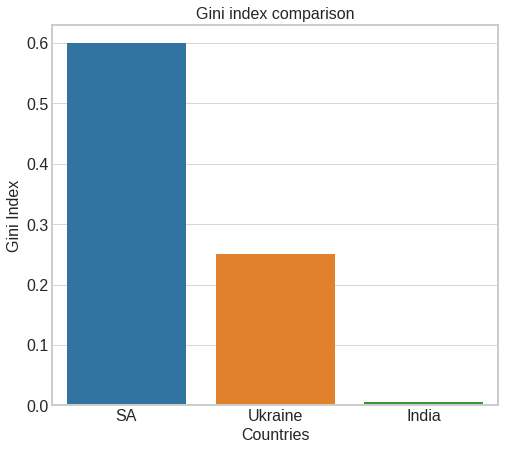

In [227]:
# your code here
plt.figure(figsize=(8,7))
sns.barplot(x=['SA','Ukraine','India'],y=[0.6,0.25, gini_index])
plt.title('Gini index comparison')
plt.xlabel('Countries')
plt.ylabel('Gini Index')
plt.show()

#### As we can see the India has a Gini Index equal to 0.0059 which means that there is a great deal of income equality among the participants. It is better than in the countries like South Africa and Ukraine in terms of salary equality.

<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">

<b> Question 7:  Multi-Linear Regression  [Optional]</b>

Now we increase the scope of our analysis to solve another problem that is related to income of the participants.

![](https://github.com/hargun3045/blog-dump/blob/master/modi.png?raw=true)

<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">

Owing to a large number of people underreporting their income to evade taxes, the Income Tax Department of India wants you to build a machine learning model that can predict the income of a given tax-payer based on commonly available information.

This will help the department red flag suspected individuals who may show discernable trends of earing more but are excessively under-reporting on their annual income.

The goal is to build the best model with the given dataset, using both categorical and continuous predictors that are available.

<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">

Fit a multiple linear regression model to the training set.
Use the `sklearn` library.

#### Deliverables
Your code should be contained in a Jupyter notebook cell.  An appropriate level of comments is necessary.  Your code should run and output the required outputs described below.

#### Required Outputs
- Fit a multiple linear regression model on the training set
- Predict on train and test sets
- Calculate the MSE for the train & test set
- Report the $R^2$ score on the test set.
- Make a plot of Residuals vs Log of predicted values $\hat{y}$, with residuals on the $Y$-axis and predicted values on the $X$-axis. Use the formula ${\epsilon} = y - \hat{y}$ to compute the residual values. Include a horizontal line denoting the zero residual value on the $Y$-axis.
- Plot a histogram of the magnitudes of the residuals.

In [228]:
# Here we use another efficient way of splitting the datset into train and test sets using a "mask"

#You can just run the code below, and just use df_train and df_test for this part of the homework directly

mask = np.ones(len(df))

# Using indices only

itrain, itest = train_test_split(range(len(df)),train_size=0.8,random_state = 25)

#setting all test indices as zero
mask[itest] = 0

# Converting mask into a boolean expression

mask = mask==1

In [229]:
df_train = df[mask] # this will give you a dataframe of only training indicies
df_test = df[~mask] # this will give you a dataframe of only test indicies

In [230]:
# A quick look of the training dataframe
df_train.head()

,age,gender,height,kgs,bmi,eating,status,marital_status,family_type,manglik,horoscope,drinking,smoking,values,complexion,body,caste_imp,employed,living,education,income,city
1,28,0,66,62,22.062,2,2,1,2,2,1,1,1,2,2,2,1,4,1,2,7500,8
3,34,0,63,58,22.651,4,1,4,1,0,1,1,1,2,2,2,0,4,1,2,4167,10
5,43,1,65,70,25.680,2,1,1,2,0,0,1,1,4,2,2,0,4,1,2,2500,12
7,29,1,63,48,18.745,2,1,3,1,2,1,1,1,4,2,2,1,4,1,2,2500,12
8,46,1,66,72,25.620,3,1,1,2,1,1,1,1,3,1,4,0,6,1,3,14167,7


In [231]:
# your code here


<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<h2 style="color:black;background-color:#F6E6E2"> Part C :  In-class competition: Kaggle Contest [Optional] </h2><br />


For this part of the exercise, you will compete with each other in a Kaggle contest. The results will be displayed live on a public leaderboard. The competition ends on the due date and time of this homework.

Participating in [Kaggle](#www.kaggle.com) competitions is a great way to practice your data science skills. Submitting a model and seeing how your results compare with those of others helps you assess your model.

Please access the following link for all relevant details (data set, submission instructions, evaluation metric, leader board, etc.):
https://www.kaggle.com/c/c001hw1/overview

### Problem Description

As you can see in your previous analysis, although the distribution of the residuals appear normally distributed, the plot of the ```residuals``` with the ```predicted income values``` shows some missing interaction between the predictors.

You are encouraged to experiment with ways to improve your model. Some ideas are given below:
- Polynomial terms for continous variables
- Interaction terms between variables
- Feature selection among given predictors

You are allowed to make multiple entries. The winning model will be the one with the highest $R^2$ score on the test set.

The winning team will win a prize by Pavlos.